In [974]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [975]:
df = pd.read_csv('export_yardi_jourentline.csv', lineterminator="\n")
df[0:11]

,GLCODE,GLNAME,PROPERTY,PROPERTYNAME,UNIT,BUILDING,SPECIALCIRCUMSTANCE,USAGEAMOUNT,USAGETYPE,DATE,PERIOD,DESCRIPTION,CONTROL,REFERENCE,AMOUNT,DEBITCREDIT,BALANCE,REMARKS
0,1110-0000,Cash,ap-mc11,4203 11TH LLC,42031,,,,,09/09/2020,12/01/2020,Webster S8 (t0034597),K-396581,165,8500.00,Credit,1813181.59,First buyout check
1,1110-0000,Cash,ap-mc11,4203 11TH LLC,42032,,,,,09/29/2020,12/01/2020,Webster (t0034598),K-405215,173,2500.00,Credit,1810681.59,
2,1110-0000,Cash,ap-mc11,4203 11TH LLC,42031,,,,,10/27/2020,12/01/2020,Webster S8 (t0034597),K-417819,183,9100.00,Credit,1801581.59,
3,1110-0000,Cash,ap-mc11,4203 11TH LLC,42052,,,,,10/29/2020,12/01/2020,Jones (t0034602),K-420897,187,3500.00,Credit,1798081.59,First Buyout Check
4,1110-0000,Cash,ap-mc11,4203 11TH LLC,42053,,,,,11/02/2020,12/01/2020,Dow (t0034603),K-421957,190,3500.00,Credit,1794581.59,First Buyout Check
5,1110-0000,Cash,ap-mc11,4203 11TH LLC,42052,,,,,11/03/2020,12/01/2020,Jones (t0034602),K-422953,192,3500.00,Credit,1791081.59,2nd buyout check
6,1110-0000,Cash,ap-mc11,4203 11TH LLC,42032,,,,,11/03/2020,12/01/2020,EMC Capital (emc),K-422964,193,1800.00,Credit,1789281.59,close out contract
7,1110-0000,Cash,ap-mc11,4203 11TH LLC,42031,,,,,11/03/2020,12/01/2020,EMC Capital (emc),K-422964,193,2640.00,Credit,1786641.59,close out contract
8,1110-0000,Cash,ap-mc11,4203 11TH LLC,42032,,,,,11/03/2020,12/01/2020,Webster (t0034598),K-423068,194,2500.00,Credit,1784141.59,2nd buyout check
9,1110-0000,Cash,ap-mc11,4203 11TH LLC,,,,,,12/01/2020,12/01/2020,Afton Properties Inc. (aftonpr),K-435761,207,360.53,Credit,1783781.06,Management Fees


In [976]:
df.columns = df.columns.map(lambda c: c.strip())

In [977]:
df = df.drop(columns=['BUILDING', 'SPECIALCIRCUMSTANCE', 'USAGEAMOUNT', 'USAGETYPE'])
#df = df.select_dtypes(exclude=['object'])
df['AMOUNT'] = df['AMOUNT'].astype(np.int64)


In [978]:
df.dtypes

GLCODE          object
GLNAME          object
PROPERTY        object
PROPERTYNAME    object
UNIT            object
DATE            object
PERIOD          object
DESCRIPTION     object
CONTROL         object
REFERENCE       object
AMOUNT           int64
DEBITCREDIT     object
BALANCE         object
REMARKS         object
dtype: object

In [979]:
label_encoder = LabelEncoder() 
amount_col = df['AMOUNT'].copy()
object_cols = [col for col in df.columns if df[col].dtype == 'object']
label_df = df.drop(columns=['AMOUNT'])
for col in set(object_cols):
    label_df[col] = label_encoder.fit_transform(label_df[col])

In [980]:
label_df.dtypes

GLCODE          int64
GLNAME          int64
PROPERTY        int64
PROPERTYNAME    int64
UNIT            int64
DATE            int64
PERIOD          int64
DESCRIPTION     int64
CONTROL         int64
REFERENCE       int64
DEBITCREDIT     int64
BALANCE         int64
REMARKS         int64
dtype: object

In [981]:
#concat amount col and label encoded cols
label_df['AMOUNT'] = amount_col.copy()

<AxesSubplot:>

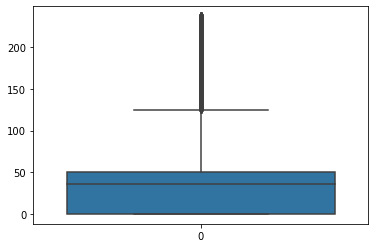

In [982]:
sns.boxplot(data=label_df['GLCODE'])

In [983]:
df_train, df_test = train_test_split(label_df)

In [984]:
model = IsolationForest()
preds = model.fit_predict(label_df)
#model.fit(df_train)
#preds = model.predict(df_test)

In [985]:
label_df['ANOMALY'] = preds
outliers=label_df.loc[label_df['ANOMALY'] == -1]
outlier_index=list(outliers.index)
print(label_df['ANOMALY'].value_counts())

 1    53000
-1    43894
Name: ANOMALY, dtype: int64
